In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, StratifiedShuffleSplit

In [3]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [4]:
# Load dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

X_train /= 255
X_test /= 255

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
print("Shape of training data", X_train.shape)
print("Shape of test data", X_test.shape)

print("Shape of training labels", y_train.shape)
print("Shape of test labels", y_test.shape)

Shape of training data (60000, 784)
Shape of test data (10000, 784)
Shape of training labels (60000,)
Shape of test labels (10000,)


In [6]:
mlpc = MLPClassifier(hidden_layer_sizes=(128,))
mlpc.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(128,))

In [7]:
cv_score = cross_val_score(mlpc, X_train, y_train.ravel(), cv =cv)
print("Training Accuracy: {:.2f} %".format(cv_score.mean()*100))

Training Accuracy: 97.73 %


In [8]:
mlpc.predict_proba(X_test[:5])

array([[1.38371907e-15, 5.31712723e-18, 1.49423982e-13, 7.44836194e-09,
        1.75370906e-20, 1.96874736e-16, 5.07118130e-24, 9.99999993e-01,
        2.57331857e-14, 3.91586178e-11],
       [7.96173584e-15, 2.29161240e-11, 1.00000000e+00, 1.45121198e-11,
        7.39829728e-31, 2.40406407e-13, 1.61188603e-13, 7.99250279e-29,
        2.80065117e-12, 1.29102466e-24],
       [6.38147850e-12, 9.99984959e-01, 8.38636150e-07, 1.48270235e-10,
        2.51899468e-06, 2.88402449e-10, 4.45980589e-10, 3.47029918e-06,
        8.21219534e-06, 4.42496511e-12],
       [1.00000000e+00, 1.44601853e-18, 8.99655904e-11, 2.53995390e-14,
        1.55831621e-15, 1.40900473e-15, 1.41689196e-12, 1.68863938e-13,
        3.73348050e-21, 1.51878605e-12],
       [6.32597833e-12, 1.04220283e-19, 2.96655605e-09, 1.78345183e-17,
        9.99996788e-01, 1.32579515e-16, 1.14707289e-12, 5.89156846e-11,
        1.01517351e-12, 3.20912346e-06]])

In [9]:
y_pred = mlpc.predict(X_test)

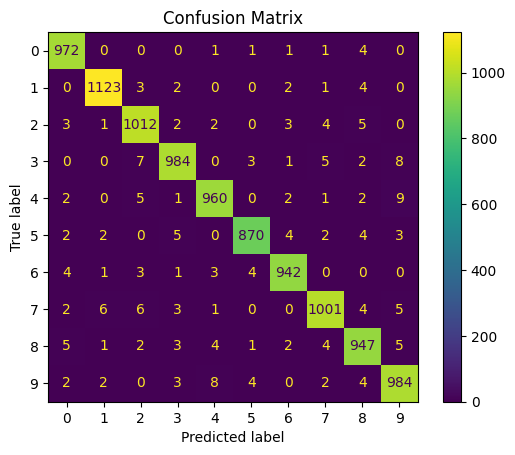

In [10]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [11]:
CR = classification_report(y_test, y_pred)
print('Classification report \n')
print(CR)

Classification report 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Text(0.5, 1.0, 'Loss curve')

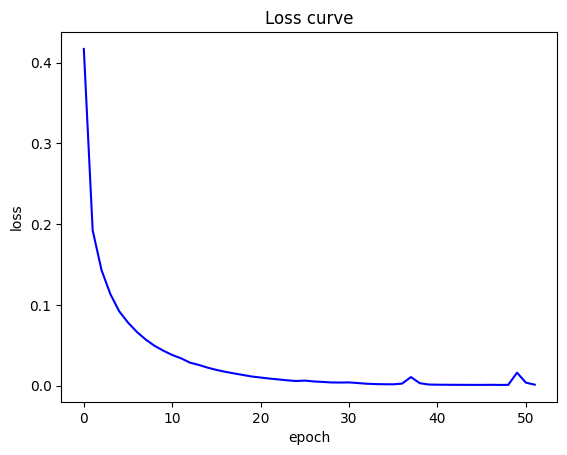

In [12]:
plt.plot(mlpc.loss_curve_, 'b-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss curve')